In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [5]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [6]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x306d116d0>>


In [7]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_AV', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [8]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  11.          64.33140625   7.97234375
    87.7428125   65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  15.          77.9          8.4
   102.          75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   11.          61.55811437   7.5927357
    90.24605873  60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  15.          62.19810427   7.31090047
    94.68720379  58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848   9.          64.65390173   6.17991329
    84.07037572  64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  10.          64.11294964   6.37266187
    86.73453237  62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  11.          71.89754224   6.5546851
    87.06513057  69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445   8.          60.80876217   6.41641168
    75.65215577  60.30166898  68.67232267   2.71043115]
  [  3.536950

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
# Define the input layer
inputs = Input(shape=(3, 9))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.2505 - val_loss: 176.3038
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.7873 - val_loss: 165.7950
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.4682 - val_loss: 158.0053
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.6085 - val_loss: 157.3392
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.6950 - val_loss: 161.0409
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.7442 - val_loss: 168.5489
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.5095 - val_loss: 183.4552
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.9522 - val_loss: 212.5059
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.5737 - val_loss: 191.1425
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.1403 - val_loss: 194.0588
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.4732 - val_loss: 193.9374
Epoch 12/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.0

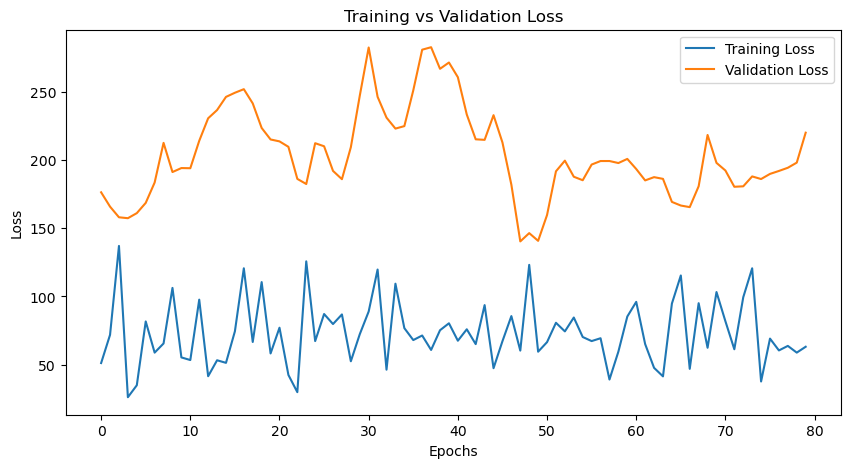

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.4383


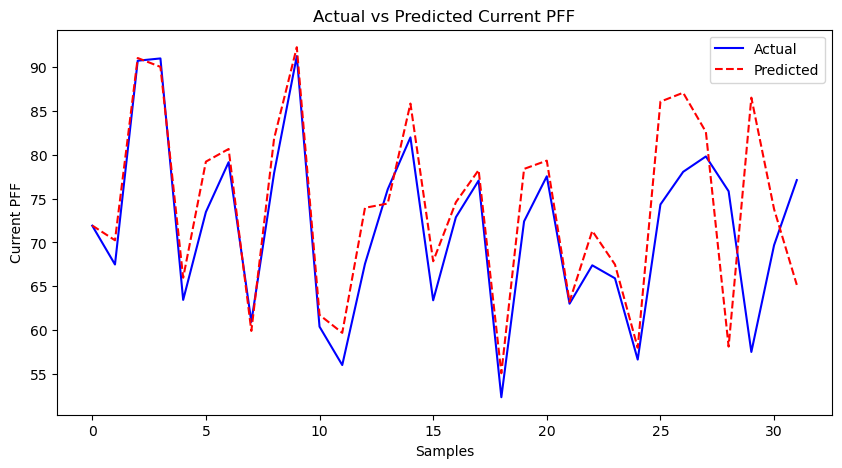

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 74.3117 - val_loss: 208.6380
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.2293 - val_loss: 186.6074
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.0582 - val_loss: 196.2189
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.7338 - val_loss: 198.9983
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.6548 - val_loss: 200.3880
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.2680 - val_loss: 232.9862
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.1026 - val_loss: 246.2255
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.9367 - val_loss: 260.7427
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.7347 - val_loss: 244.1795
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.5181 - val_loss: 225.8829
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.5225 - val_loss: 241.5750
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

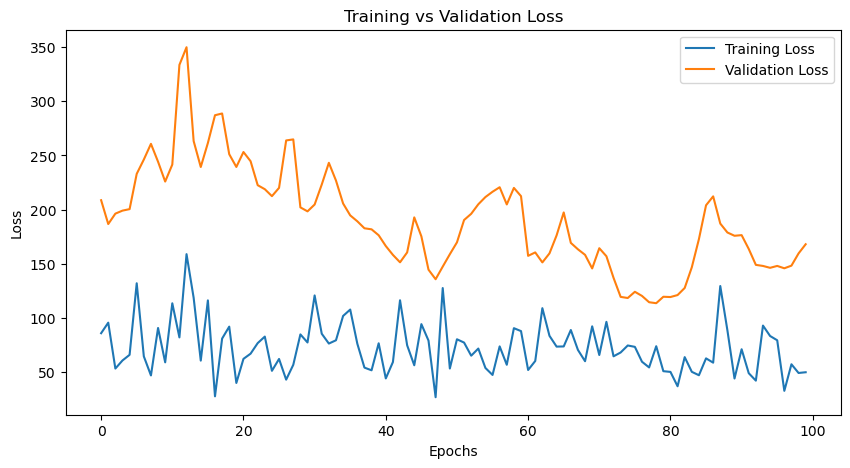

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.5885


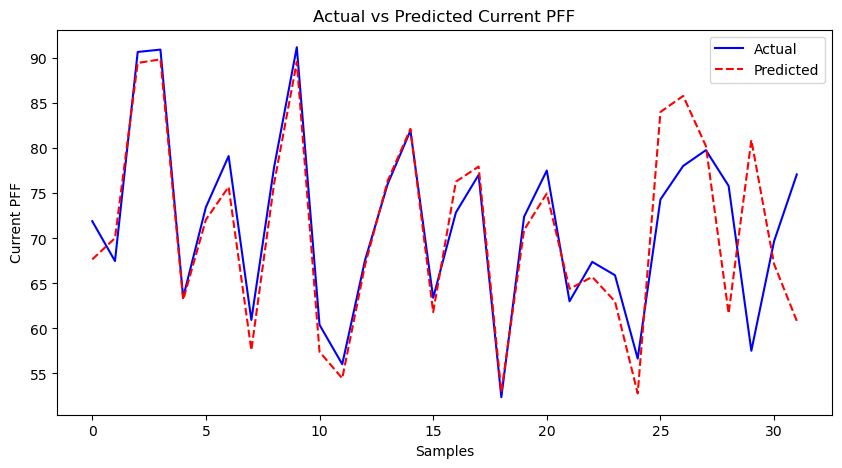

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.3202 - val_loss: 160.7651
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.2118 - val_loss: 169.0745
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.1746 - val_loss: 193.8407
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.1140 - val_loss: 173.1264
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.3428 - val_loss: 155.2744
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.8979 - val_loss: 166.4396
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0727 - val_loss: 172.4636
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.0388 - val_loss: 177.8505
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.7217 - val_loss: 176.2468
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.1284 - val_loss: 174.1748
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.5879 - val_loss: 178.8584
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

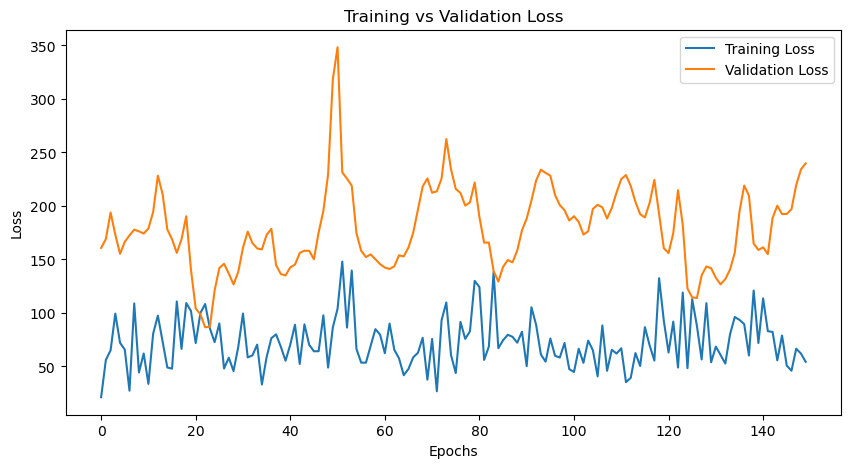

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.4179


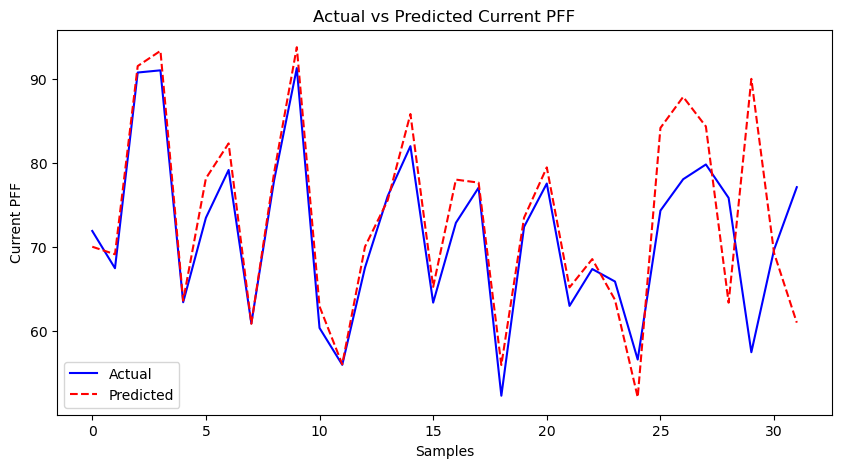

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 53.2155 - val_loss: 241.8625
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.1726 - val_loss: 222.6015
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.0804 - val_loss: 209.6020
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.6888 - val_loss: 196.5298
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.6405 - val_loss: 180.2254
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.1433 - val_loss: 173.9455
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.1038 - val_loss: 194.0006
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.9132 - val_loss: 194.7838
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.3337 - val_loss: 186.8743
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.4398 - val_loss: 177.1028
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.6835 - val_loss: 173.5745
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

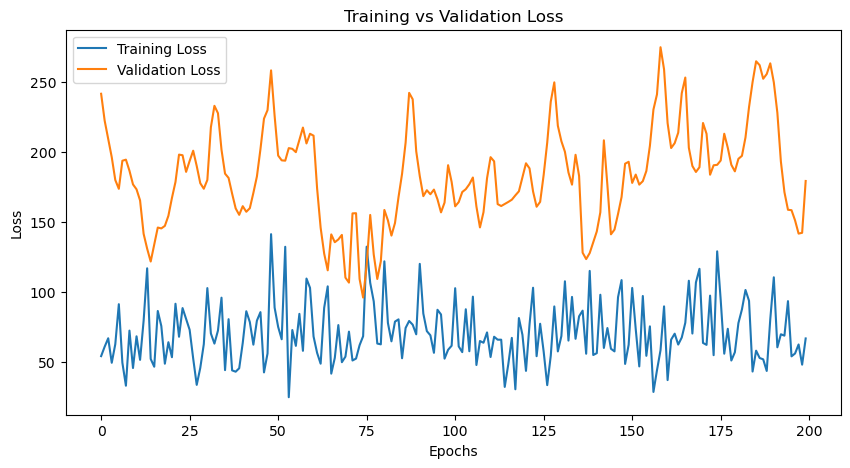

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.5464


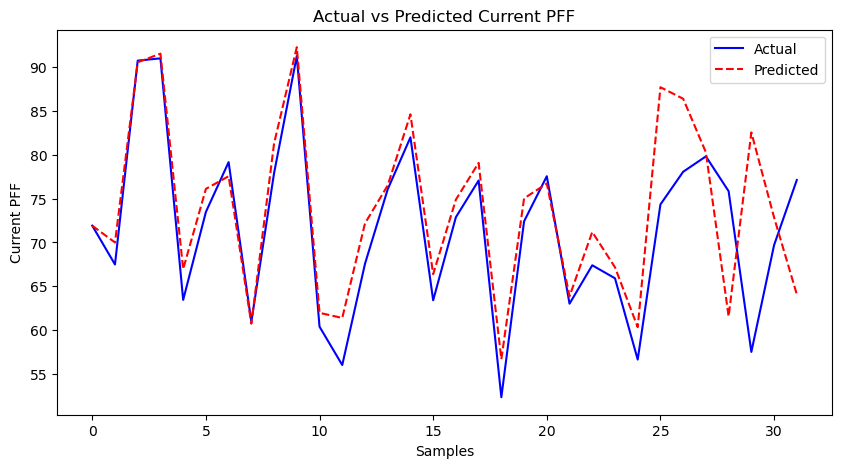

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79.5755 - val_loss: 198.0285
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.5800 - val_loss: 159.8160
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.1777 - val_loss: 129.2189
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.7431 - val_loss: 120.6669
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.5962 - val_loss: 107.9134
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.9603 - val_loss: 131.9549
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.0327 - val_loss: 164.4355
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.2218 - val_loss: 173.2729
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.0688 - val_loss: 166.2808
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114.1217 - val_loss: 172.7661
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5414 - val_loss: 194.3506
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

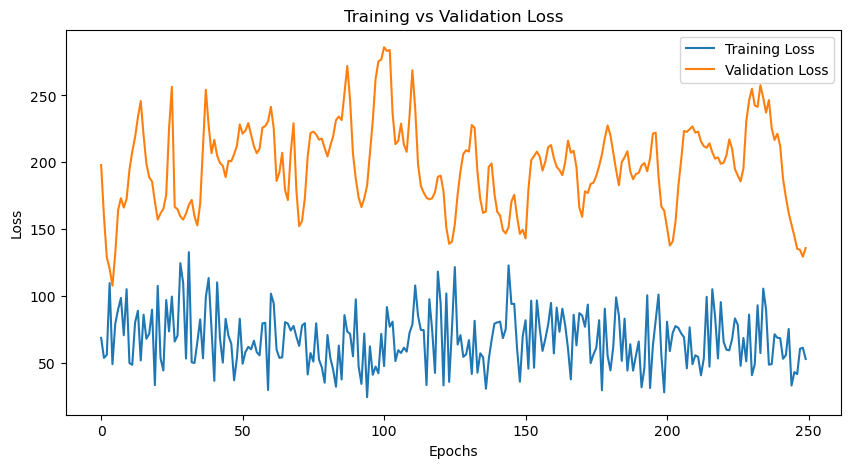

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.6389


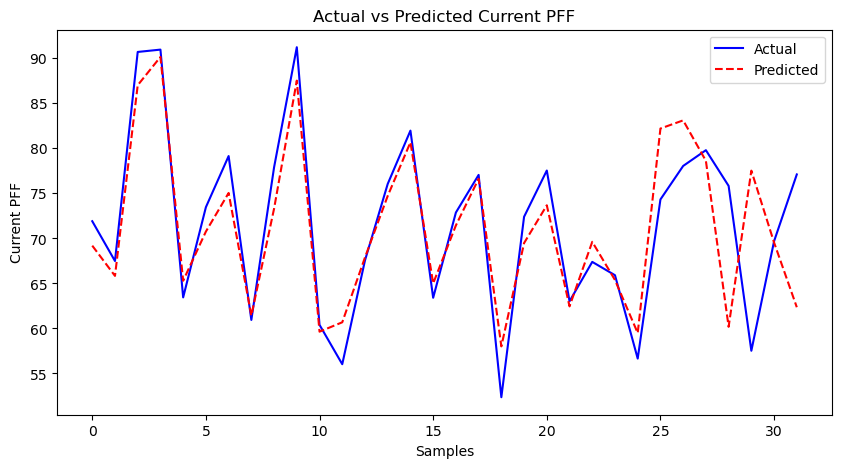

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 114.7106 - val_loss: 143.3413
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.0899 - val_loss: 155.7699
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.7659 - val_loss: 168.2288
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.6731 - val_loss: 171.3995
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.0405 - val_loss: 181.4645
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.9982 - val_loss: 189.6422
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.4064 - val_loss: 196.6064
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.1179 - val_loss: 201.3011
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.5438 - val_loss: 208.2434
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.9546 - val_loss: 209.5618
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3755 - val_loss: 192.9519
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

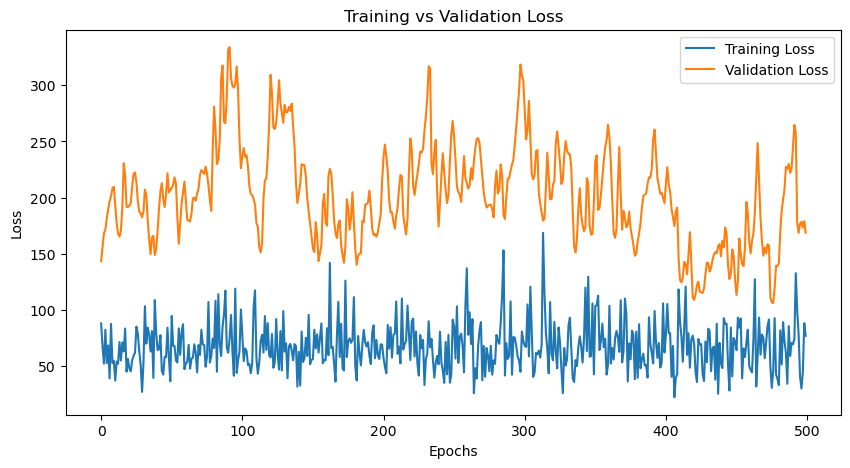

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
R² Score: 0.5585


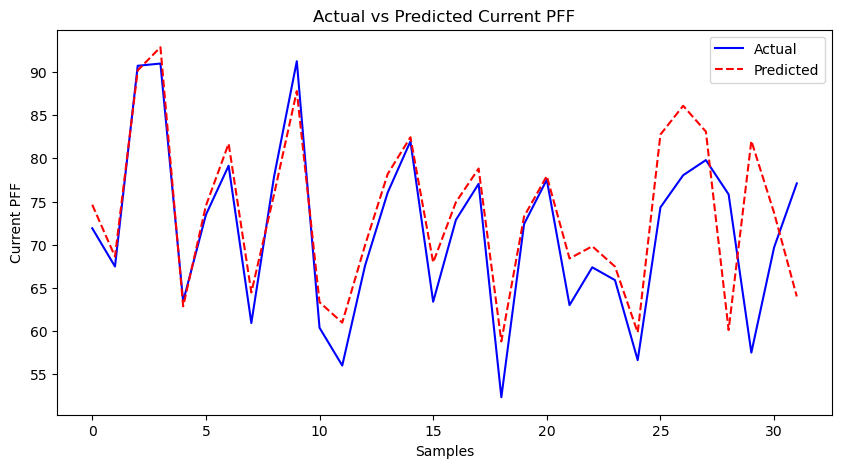

Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.3816 - val_loss: 155.0730
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.6813 - val_loss: 155.3606
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.5818 - val_loss: 158.4157
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.0973 - val_loss: 169.0507
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.6180 - val_loss: 167.5872
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.9606 - val_loss: 159.2079
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.9682 - val_loss: 157.0457
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.3253 - val_loss: 136.9687
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.5757 - val_loss: 116.5608
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 89.4908 - val_loss: 125.0767
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.9152 - val_loss: 149.9736
Epoch 12/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

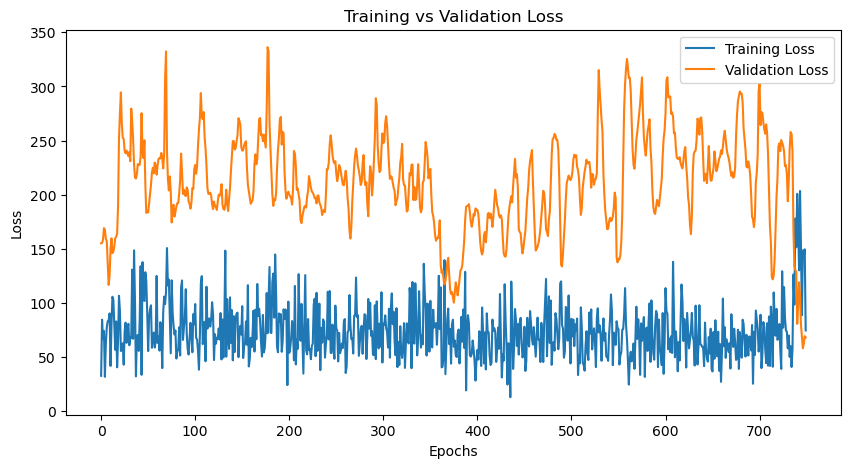

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
R² Score: 0.1773


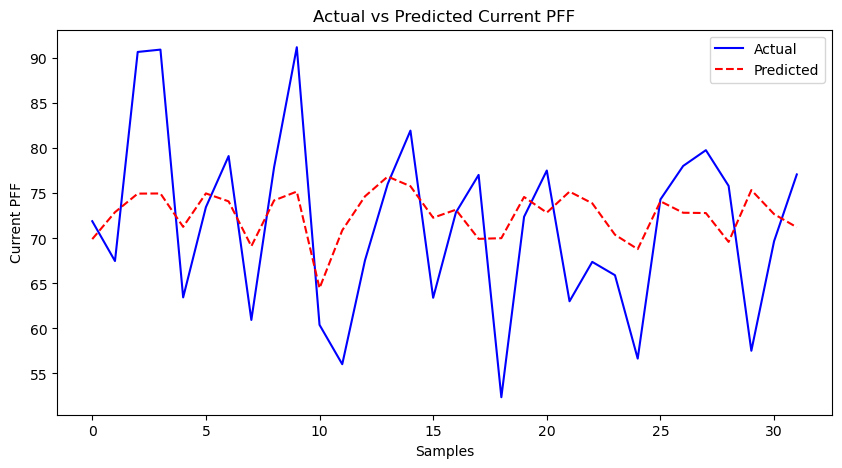

In [16]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [80, 100, 150, 200, 250, 500, 750]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()



